First, I will generate example data by running a script that we keep in the dataportal repo.

```
python dataportal/dataportal/examples/sample_data/image_and_scalar.py
```

In [4]:
import dataportal
from dataportal.broker import DataBroker as db, get_events, get_table, Images

In [2]:
dataportal.__version__  # we need v0.2.0 or greater

'0.2.0'

In [5]:
header = db[-1]  # get the most recent scan, which should be our example data generated above

In [7]:
header

{'descriptors': [{'data_keys': {'img': {'dtype': 'array',
     'external': 'FILESTORE:',
     'shape': [5, 5],
     'source': 'CCD'},
    'img_sum_x': {'dtype': 'array',
     'external': 'FILESTORE:',
     'shape': [5],
     'source': 'CCD:xsum'},
    'img_sum_y': {'dtype': 'array',
     'external': 'FILESTORE:',
     'shape': [5],
     'source': 'CCD:ysum'},
    'img_x_max': {'dtype': 'number', 'shape': [], 'source': 'CCD:xmax'},
    'img_y_max': {'dtype': 'number', 'shape': [], 'source': 'CCD:ymax'},
    'linear_motor': {'dtype': 'number', 'shape': [], 'source': 'PV:ES:sam_x'},
    'total_img_sum': {'dtype': 'number', 'shape': [], 'source': 'CCD:sum'}},
   'run_start': '1cea8e4c-08dc-4058-8c9d-413df7bf8a08',
   'time': 0.0,
   'uid': 'f7e4cce4-fee0-4071-817d-a0bcba85b479'},
  {'data_keys': {'Tsam': {'dtype': 'number',
     'shape': [],
     'source': 'PV:ES:Tsam'}},
   'run_start': '1cea8e4c-08dc-4058-8c9d-413df7bf8a08',
   'time': 0.0,
   'uid': 'c3a2d1ad-51fe-4daa-a52f-ac8c1515ea66'}],
 'start': {'beamline_id': 'csx',
  'group': '',
  'moon': 'full',
  'owner': '',
  'plotx': 'linear_motor',
  'ploty': ['total_img_sum'],
  'project': '',
  'sample': {},
  'scan_id': 3,
  'time': 1442506826.99873,
  'uid': '1cea8e4c-08dc-4058-8c9d-413df7bf8a08'},
 'stop': {'exit_status': 'success',
  'reason': 'run completed',
  'run_start': {'beamline_id': 'csx',
   'group': '',
   'moon': 'full',
   'owner': '',
   'plotx': 'linear_motor',
   'ploty': ['total_img_sum'],
   'project': '',
   'sample': {},
   'scan_id': 3,
   'time': 1442506826.99873,
   'uid': '1cea8e4c-08dc-4058-8c9d-413df7bf8a08'},
  'time': 1442506828.700854,
  'uid': 'd5388ff2-2df1-41ee-af64-72c160ecfde4'}}

## How else can we look for headers?

* `db[-5:]` all of the last five
* `db(start_time='2015-10')`
* `db['234owfweoi-234dwflkwej']` uids ("unique IDs") the only way to *sure* you have the right data; it corresponds to `header.start['uid']`. Note that you can use the first few character; you don't the need the entire string.

In [37]:
header = db['1cea8']

## The sophisticated way: get a Python generator of Event Documents

In [14]:
events = get_events(header)

In [15]:
events  # this is "lazy" -- the data is not yet loaded

<generator object get_events at 0x109dc7b88>

In [16]:
events = list(events)  # making it a list forces Python to actually go get the data

In [18]:
len(events)

220

In [20]:
events[0]['data']  # this is a dict mapping field names to the actual data

{'img': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'img_sum_x': array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000

### If we didn't want the image data, we can save time by not looking it up!

In [26]:
events = get_events(header, ['img_y_max', 'img_x_max'])  # we specify which fields we want

In [27]:
list(events)[0]['data']

{'img_x_max': 249.0, 'img_y_max': 250.0}

## The simpler way: get a pandas DataFrame directly

This doesn't really make sense for *images* but it's great for scalars. It technically works on images, but pandas will be slow.

In [30]:
table = get_table(header, ['img_y_max', 'img_x_max'])
table

,time,img_x_max,img_y_max
0,0.014693,249,250
1,0.988204,248,249
2,1.993141,246,249
3,3.002155,245,248
4,3.992940,245,247
5,5.017639,245,246
6,5.997496,245,245
7,7.005259,245,244
8,8.002993,245,244
9,9.010165,245,244


## The simpler way Part 2: get Images as PIMS objects

In [31]:
imgs = Images(header, 'img')

/Users/dallan/Documents/Repos/dataportal/dataportal/broker/simple_broker.py:168: UserWarning: Use top-level function get_events() instead.
  "get_events() instead.", UserWarning)


In [32]:
imgs

<Frames>
Length: 20 frames
Frame Shape: 500 x 500
Pixel Datatype: float64

Frame([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
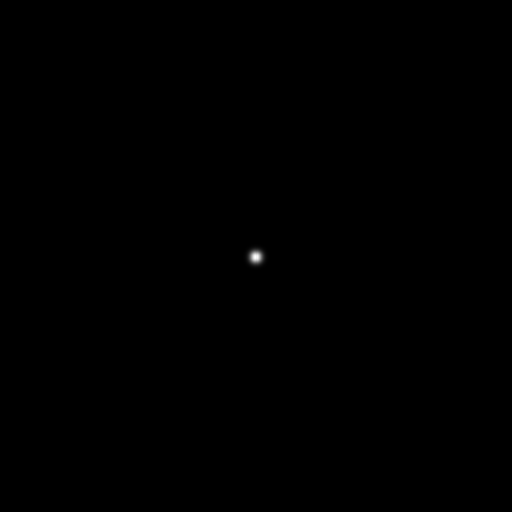

In [33]:
imgs[0]

In [35]:
for img in imgs[5:10]:
    print(img.sum())

94.2511454645
94.2569143278
94.2713332989
94.3054810717
94.382080473
